In [1]:
import json
import pandas as pd
import os
from tqdm import tqdm
from pydub import AudioSegment  
import matplotlib.pyplot as plt

In [2]:
root_dirs = {
    "Birdsong" : "/speech/Databases/Birdsong/BirdSong",
    "IEMOCAP"  : "/speech/Databases/Birdsong/IEMOCAP/",
    "MusicalInstruments" : "/speech/Databases/Birdsong/MusicalInstruments",
}

# BirdSong

In [12]:
root_dir = root_dirs["Birdsong"]

ff_txt = os.path.join(root_dir,"freefield1010/6035814")
df1 = pd.read_csv(ff_txt) 
df1['Path'] = df1.apply(lambda row: os.path.join( 'freefield1010','spec',str(row.itemid)+'.wav.npy'), axis = 1)
df1['AudioPath'] = df1.apply(lambda row: os.path.join( 'freefield1010','wav',str(row.itemid)+'.wav'), axis = 1)
df1.rename(columns = {'hasbird':'Label'}, inplace = True)
wab_txt = os.path.join(root_dir,"Warblr/6035817")
df2 = pd.read_csv(wab_txt) 
df2['Path'] = df2.apply(lambda row: os.path.join( 'Warblr','spec',str(row.itemid)+'.wav.npy'), axis = 1)
df2['AudioPath'] = df2.apply(lambda row: os.path.join( 'Warblr','wav',str(row.itemid)+'.wav'), axis = 1)
df2.rename(columns = {'hasbird':'Label'}, inplace = True)
combined_df = df1.append(df2)

In [14]:
dataset = combined_df
dataset["lenghts"] = None
for idx,row in dataset.iterrows() :
    wav_file = AudioSegment.from_file(file = os.path.join(root_dir,row['AudioPath']), format = "wav")
    dataset.loc[idx,"lenghts"] = len(wav_file)    

48414


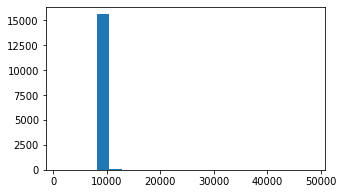

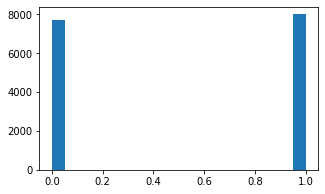

In [15]:
print(max(dataset["lenghts"].values))
fig, ax = plt.subplots(figsize =(5, 3))
ax.hist(dataset["lenghts"].values,bins=20)
fig, ax = plt.subplots(figsize =(5,3))
ax.hist(dataset["Label"].values,bins=20)
plt.show()

## Feats Generation

## Write Data

In [ ]:
df1 = df1.reindex(columns=['Path','Label'])
df1.to_csv(os.path.join(root_dir,"freefield1010_data.csv"),index=False)
df2 = df2.reindex(columns=['Path','Label'])
df2.to_csv(os.path.join(root_dir,"Warblr_data.csv"),index=False)
combined_df = combined_df.reindex(columns=['Path','Label'])
combined_df.to_csv(os.path.join(root_dir,"combined_data.csv"),index=False)

# IEMOCAP

In [38]:
root_dir = root_dirs["IEMOCAP"]

full_datacsv = pd.read_csv(os.path.join(root_dir,'iemocap_final.csv'))
full_datacsv['type'] = full_datacsv.apply(lambda row: "test" if str(row.wav_file).startswith('Ses05') else "train",
                                            axis=1)
full_datacsv['AudioPath'] = full_datacsv.apply(lambda row: os.path.join('wav',str(row.wav_file)+'.wav'), axis = 1)
full_datacsv['Path'] = full_datacsv.apply(lambda row: os.path.join('spec',str(row.wav_file)+'.wav.npy'), axis = 1)
full_datacsv['Label'] = full_datacsv['emotion'] 
full_datacsv.drop(['index','start_time','end_time','val' ,'act' ,'dom' ,'emotion','wav_file'],axis=1,inplace=True)


In [39]:
print(full_datacsv['Label'].unique())
index_names = full_datacsv[ full_datacsv['Label'].isin(['fru','exc','sur','oth','fea','dis']) ].index
full_datacsv.drop(index_names, inplace = True)
print(full_datacsv['Label'].unique())

['neu' 'fru' 'ang' 'sad' 'hap' 'exc' 'sur' 'oth' 'fea' 'dis']
['neu' 'ang' 'sad' 'hap']


In [40]:
dataset = full_datacsv
dataset["lenghts"] = None
for idx,row in dataset.iterrows() :
    wav_file = AudioSegment.from_file(file = os.path.join(root_dir,row['AudioPath']), format = "wav")
    dataset.loc[idx,"lenghts"] = len(wav_file)

31910


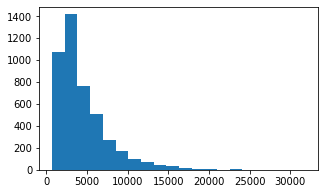

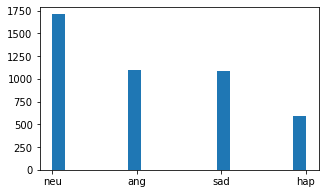

In [41]:
print(max(dataset["lenghts"].values))
fig, ax = plt.subplots(figsize =(5, 3))
ax.hist(dataset["lenghts"].values,bins=20)
fig, ax = plt.subplots(figsize =(5,3))
ax.hist(dataset["Label"].values,bins=20)
# Show plot
plt.show()

## Write Data

In [42]:
full_datacsv

,type,AudioPath,Path,Label,lenghts
0,train,wav/Ses01F_impro01_F000.wav,spec/Ses01F_impro01_F000.wav.npy,neu,1946
1,train,wav/Ses01F_impro01_F001.wav,spec/Ses01F_impro01_F001.wav.npy,neu,1382
2,train,wav/Ses01F_impro01_F002.wav,spec/Ses01F_impro01_F002.wav.npy,neu,3130
3,train,wav/Ses01F_impro01_F005.wav,spec/Ses01F_impro01_F005.wav.npy,neu,4030
9,train,wav/Ses01F_impro01_F012.wav,spec/Ses01F_impro01_F012.wav.npy,ang,2750
...,...,...,...,...,...
7527,test,wav/Ses05M_script03_2_M041.wav,spec/Ses05M_script03_2_M041.wav.npy,ang,8260
7528,test,wav/Ses05M_script03_2_M042.wav,spec/Ses05M_script03_2_M042.wav.npy,ang,1740
7529,test,wav/Ses05M_script03_2_M043.wav,spec/Ses05M_script03_2_M043.wav.npy,ang,2240
7530,test,wav/Ses05M_script03_2_M044.wav,spec/Ses05M_script03_2_M044.wav.npy,ang,4470


In [43]:
full_datacsv = full_datacsv.reindex(columns=['Path','Label','type'])
grouped = full_datacsv.groupby(full_datacsv.type)

train = grouped.get_group("train").drop(['type'],axis=1)
test  = grouped.get_group("test").drop(['type'],axis=1)
print(len(train))
print(len(test))
# print(full_datacsv)
train.to_csv(os.path.join(root_dir,'train_data.csv'),index=False)
test.to_csv(os.path.join(root_dir,'test_data.csv'),index=False)
# full_datacsv.to_csv(os.path.join(root_dir,'data.csv'),index=False)

3548
942


# Voxceleb

In [ ]:
train_csv = pd.read_csv("/speech/Databases/Birdsong/Voxceleb1/dev/test_vox.csv")
lenghts = []
drop_index = []
for idx,row in train_csv.iterrows() :
    wav_file = AudioSegment.from_file(file = os.path.join("/speech/Databases/Birdsong/Voxceleb1/dev/wav",row['file_path'][46:]), 
                                  format = "wav")
    lenghts.append(len(wav_file))
    if len(wav_file) > 50000 :
        drop_index.append(idx)


train_new_csv = train_csv.drop(drop_index,axis=0)
print(len(train_csv)- len(train_new_csv))
# train_new_csv.to_csv("/speech/Databases/Birdsong/Voxceleb1/dev/train_new_vox.csv")
train_new_csv['Path'] = train_new_csv.apply(lambda row: os.path.join('spec',str(str(row.file_path)[46:]+'.npy')) , axis = 1)
train_new_csv  = train_new_csv.drop(['file_path'],axis=1)
train_new_csv = train_new_csv.reindex(columns=['Path','label'])
train_new_csv.to_csv("/speech/Databases/Birdsong/Voxceleb1/dev/test_data.csv",index=False)

In [ ]:
dataset = train_new_csv
dataset["lenghts"] = None
for idx,row in dataset.iterrows() :
    wav_file = AudioSegment.from_file(file = os.path.join(root_dir,'wav',row['wav_file']+'.wav'), format = "wav")
    dataset.loc[idx,"lenghts"] = len(wav_file)

In [ ]:
print(max(dataset["lenghts"].values))
fig, ax = plt.subplots(figsize =(5, 3))
ax.hist(dataset["lenghts"].values,bins=20)
fig, ax = plt.subplots(figsize =(5,3))
ax.hist(dataset["Label"].values,bins=20)
# Show plot
plt.show()

# TuT Urban

In [ ]:
root_dir = "/speech/Databases/Birdsong/TutUrban/TUT-urban-acoustic-scenes-2018-development"

train_df = pd.read_csv(os.path.join(root_dir,"evaluation_setup","fold1_train.txt"),sep="\t",header=None)
train_df.columns = ["AudioPath","Label"]

In [ ]:
train_df

In [ ]:
dataset = train_df
dataset["lenghts"] = None
for idx,row in dataset.iterrows() :
    wav_file = AudioSegment.from_file(file = os.path.join(root_dir,'wav',row['AudioPath']+'.wav'), format = "wav")
    dataset.loc[idx,"lenghts"] = len(wav_file)

In [ ]:
print(max(dataset["lenghts"].values))
fig, ax = plt.subplots(figsize =(5, 3))
ax.hist(dataset["lenghts"].values,bins=20)
fig, ax = plt.subplots(figsize =(5,3))
ax.hist(dataset["Label"].values,bins=20)
# Show plot
plt.show()

# Speech Commands V1

In [ ]:
root_dir = "/speech/Databases/Birdsong/SpeechCommandsV1/train"

test_labels = ["yes", "no", "up", "down","left", "right", "on", "off", "stop", "go" ] #10
core_labels = test_labels + ["zero","one","two","three","four","five","six","seven","eight","nine"] # 20
auxliary_labels = ["bird","dog","happy", "wow","bed","cat","house","marvin","sheila","tree"] #10
labels = core_labels+ auxliary_labels

train_df = pd.DataFrame(columns = [ 'AudioPath', 'Label'])
audio_root_dir = os.path.join(root_dir , "audio")

for labe_id,label in tqdm(enumerate(labels)):
    audiofiles = os.listdir(os.path.join(audio_root_dir,label))
    for file in tqdm(audiofiles ,leave=False):
        file_path = os.path.join(label,file)
        train_df=train_df.append( {'AudioPath' : file_path, 'Label' : label} , ignore_index = True)

In [ ]:
train_df

In [ ]:
dataset = train_df
dataset["lenghts"] = None
for idx,row in tqdm(dataset.iterrows()) :
    wav_file = AudioSegment.from_file(file = os.path.join(root_dir,'audio',row['AudioPath']), format = "wav")
    dataset.loc[idx,"lenghts"] = len(wav_file)

In [ ]:
print(max(dataset["lenghts"].values))
fig, ax = plt.subplots(figsize =(5, 3))
ax.hist(dataset["lenghts"].values,bins=20)
fig, ax = plt.subplots(figsize =(15,3))
ax.hist(dataset["Label"].values,bins=20)
# Show plot
plt.show()

# Libri100

In [ ]:
root_dir = "/speech/Databases/Birdsong/Libri100SpkId/"

In [ ]:
utt2spk_root = os.path.join(root_dir,"utt2spk")
utt2spk = dict()
with open(utt2spk_root) as f:
    for x in tqdm(f):
        key , value = x.split()
        if utt2spk.get(key, None)==None:
            utt2spk[key] = value #.add(1, 'Geeks')
        else:
            raise NotImplementedError    


In [ ]:
train_txt = os.path.join(root_dir,"train_split.txt")
test_txt = os.path.join(root_dir,"test_split.txt")
train_ids = []
test_ids = []

print("no_of_speakers",len(set(utt2spk.values())))


with open(test_txt) as f:
    test_ids = f.read().splitlines() 


test_csv = pd.DataFrame(columns = ['AudioPath', 'Label'])
test_speakers=[]
for i in tqdm(test_ids):
    test_speakers.append(utt2spk[i])
    test_csv = test_csv.append({'AudioPath' : i+'.wav', 'Label' : utt2spk[i] }, 
                ignore_index = True)
print("no_of_speakers",len(set(test_speakers)))



with open(train_txt) as f:
    train_ids = f.read().splitlines() 


train_csv = pd.DataFrame(columns = ['AudioPath', 'Label'])
train_speakers=[]
for i in tqdm(train_ids):
    train_speakers.append(utt2spk[i])
    train_csv = train_csv.append({'AudioPath' : i+'.wav', 'Label' : utt2spk[i] }, 
                ignore_index = True)
print("no_of_speakers",len(set(train_speakers)))


In [ ]:
train_csv

In [ ]:
dataset = train_csv
dataset["lenghts"] = None
for idx,row in tqdm(dataset.iterrows()) :
    wav_file = AudioSegment.from_file(file = os.path.join(root_dir,'wav',row['AudioPath']), format = "wav")
    dataset.loc[idx,"lenghts"] = len(wav_file)

In [ ]:
print(max(dataset["lenghts"].values))
fig, ax = plt.subplots(figsize =(5, 3))
ax.hist(dataset["lenghts"].values,bins=20)
fig, ax = plt.subplots(figsize =(15,3))
ax.hist(dataset["Label"].values,bins=20)
# Show plot
plt.show()

# Musical Instruments

* nsynth-train : (289205)

In [8]:

root_dir = root_dirs["MusicalInstruments"] 

fi = open(os.path.join(root_dir,'nsynth-train','examples.json'))
train_json = json.load(fi)
train_csv=pd.DataFrame(columns=['AudioPath','Path','Label'])
for key in tqdm(train_json.keys()):
    train_csv=train_csv.append({'Path' : os.path.join('nsynth-train','spec',key+'.wav.npy'),
                                'Label' : train_json[key]['instrument_family'] ,
                                'AudioPath' : os.path.join('nsynth-train','audio',key+'.wav'),
                                },ignore_index=True)
fi.close()

fi = open(os.path.join(root_dir,'nsynth-valid','examples.json'))
valid_json = json.load(fi)

valid_csv=pd.DataFrame(columns=['AudioPath','Path','Label'])
for key in tqdm(valid_json.keys()):
    valid_csv=valid_csv.append({'Path' : os.path.join('nsynth-valid','spec',key+'.wav.npy'),
                                'Label' : valid_json[key]['instrument_family'],
                                'AudioPath' : os.path.join('nsynth-valid','audio',key+'.wav'), 
    },ignore_index=True)
fi.close()

fi = open(os.path.join(root_dir,'nsynth-test','examples.json'))
test_json = json.load(fi)

test_csv=pd.DataFrame(columns=['AudioPath','Path','Label'])
for key in tqdm(valid_json.keys()):
    valid_csv=valid_csv.append({'Path' : os.path.join('nsynth-test','spec',key+'.wav.npy'),
                                'Label' : valid_json[key]['instrument_family'],
                                'AudioPath' : os.path.join('nsynth-test','audio',key+'.wav'), 
                                },ignore_index=True)
fi.close()

# train_csv.to_csv(os.path.join(root_dir,'train_data.csv'),index=False)
# valid_csv.to_csv(os.path.join(root_dir,'valid_data.csv'),index=False)
# test_csv.to_csv(os.path.join(root_dir,'test_data.csv'),index=False)







 23%|██▎       | 67026/289205 [04:25<14:39, 252.55it/s]


KeyboardInterrupt: 

In [7]:
valid_csv

,Path,Label,AudioPath,lenghts
0,nsynth-valid/spec/keyboard_acoustic_004-060-02...,4,nsynth-valid/audio/keyboard_acoustic_004-060-0...,4000
1,nsynth-valid/spec/bass_synthetic_033-050-100.w...,0,nsynth-valid/audio/bass_synthetic_033-050-100.wav,4000
2,nsynth-valid/spec/bass_synthetic_009-052-050.w...,0,nsynth-valid/audio/bass_synthetic_009-052-050.wav,4000
3,nsynth-valid/spec/keyboard_electronic_003-064-...,4,nsynth-valid/audio/keyboard_electronic_003-064...,4000
4,nsynth-valid/spec/bass_synthetic_034-030-050.w...,0,nsynth-valid/audio/bass_synthetic_034-030-050.wav,4000
...,...,...,...,...
12673,nsynth-valid/spec/bass_electronic_025-051-127....,0,nsynth-valid/audio/bass_electronic_025-051-127...,4000
12674,nsynth-valid/spec/flute_synthetic_000-080-025....,2,nsynth-valid/audio/flute_synthetic_000-080-025...,4000
12675,nsynth-valid/spec/vocal_synthetic_003-073-025....,10,nsynth-valid/audio/vocal_synthetic_003-073-025...,4000
12676,nsynth-valid/spec/bass_synthetic_134-036-100.w...,0,nsynth-valid/audio/bass_synthetic_134-036-100.wav,4000


In [5]:
dataset = train_csv
dataset["lenghts"] = None
for idx,row in dataset.iterrows() :
    wav_file = AudioSegment.from_file(file = os.path.join(root_dir,row['AudioPath']), format = "wav")
    dataset.loc[idx,"lenghts"] = len(wav_file)    

4000


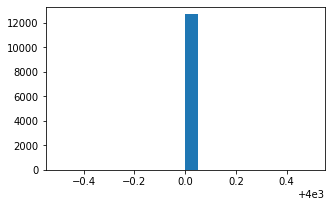

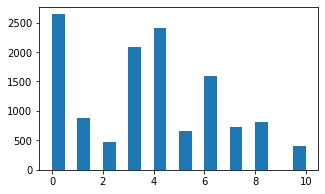

In [6]:
print(max(dataset["lenghts"].values))
fig, ax = plt.subplots(figsize =(5, 3))
ax.hist(dataset["lenghts"].values,bins=20)
fig, ax = plt.subplots(figsize =(5,3))
ax.hist(dataset["Label"].values,bins=20)
plt.show()